<a href="https://colab.research.google.com/github/panghanwu/neural_network_algorithm/blob/main/MLP_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial loss: 15.712728443641241


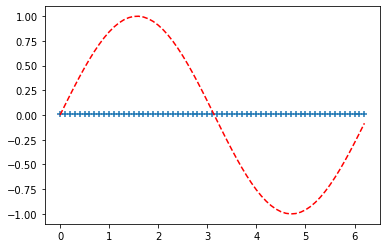

In [7]:
import numpy as np
import matplotlib.pyplot as plt

"""Initializing"""
# data
x = np.arange(0, np.pi*2, 0.1)  # input data
t = np.sin(x)  # correct answer

# parameter
n_data = len(x)
wb_shrinker = 0.01 #  initialize
eta = 0.1  # learning rate

# initial 
w1 = wb_shrinker * np.random.randn(1,3)
b1 = wb_shrinker * np.random.randn(3)
w2 = wb_shrinker * np.random.randn(3,1)
b2 = wb_shrinker * np.random.randn(1)

# forward
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

init_loss = np.sum(np.square(y2.reshape(-1)-t))/2.0
print('Initial loss:', init_loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2, marker='+')
plt.show()

Loss: 5.104361890807019
Improvement: 3.079250494838782


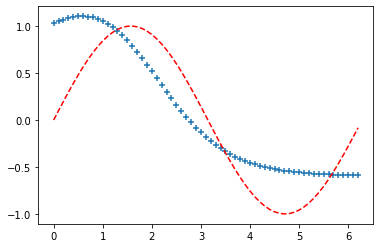

In [2]:
"""Training with single data"""

epoch = 100
for e in range(epoch):
  for i in range(n_data):
    # forward
    u1 = np.dot(x[i].reshape(-1,1), w1) + b1
    y1 = 1/(1+np.exp(-u1))
    y2 = np.dot(y1, w2) + b2

    # backward
    delta2 = y2 - t[i].reshape(-1,1)
    grad_w2 = np.dot(y1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_y1 = np.dot(delta2, w2.T)
    delta1 = grad_y1 * (1-y1) * y1
    grad_w1 = np.dot(x[i].reshape(-1,1).T, delta1)
    grad_b1 = np.sum(delta1, axis=0)

    # update
    w1 -= eta * grad_w1
    b1 -= eta * grad_b1
    w2 -= eta * grad_w2
    b2 -= eta * grad_b2


# result
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

loss = np.sum(np.square(y2.reshape(-1)-t))/2.0
print('Loss:', loss)
print('Improvement:', init_loss/loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2, marker='+')
plt.show()

Loss: 15.570519609416202
Improvement: 1.0087224343642132


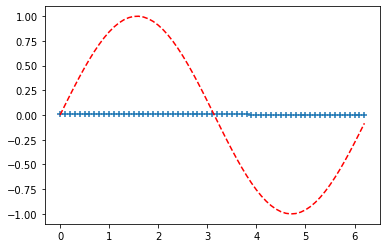

In [4]:
"""Training with whole data"""

epoch = 100
for e in range(epoch):
  # forward
  u1 = np.dot(x.reshape(-1,1), w1) + b1
  y1 = 1/(1+np.exp(-u1))
  y2 = np.dot(y1, w2) + b2

  # backward
  delta2 = y2 - t.reshape(-1,1)
  grad_w2 = np.dot(y1.T, delta2) / n_data
  grad_b2 = np.sum(delta2, axis=0) / n_data
  grad_y1 = np.dot(delta2, w2.T)
  delta1 = grad_y1 * (1-y1) * y1
  grad_w1 = np.dot(x.reshape(-1,1).T, delta1) / n_data
  grad_b1 = np.sum(delta1, axis=0) / n_data

  # update
  w1 -= eta * grad_w1
  b1 -= eta * grad_b1
  w2 -= eta * grad_w2
  b2 -= eta * grad_b2

# result
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

loss = np.sum(np.square(y2.reshape(-1)-t))/2.0
print('Loss:', loss)
print('Improvement:', init_loss/loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2, marker='+')
plt.show()

Loss: 6.976237357944189
Improvement: 2.2519310236548935


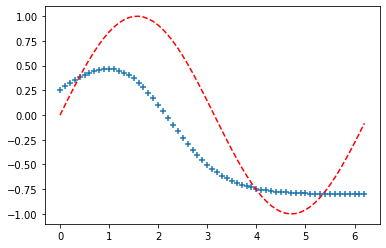

In [6]:
"""Training with adjustabale batch size"""
# batch
bs = 3  # batch size
batch_number = int(n_data/bs) + 1

epoch = 100
for e in range(epoch):
  x_ = np.append(x, x)
  t_ = np.append(t, t)
  batch_x = []
  batch_t = []
  for i in range(batch_number):
    batch_x.append(x_[bs*i:bs*i+bs])
    batch_t.append(t_[bs*i:bs*i+bs])

  # training

  total_error = 0
  for i in range(batch_number):
    # forward
    u1 = np.dot(batch_x[i].reshape(-1,1), w1) + b1
    y1 = 1/(1+np.exp(-u1))
    y2 = np.dot(y1, w2) + b2

    # backward
    delta2 = y2 - batch_t[i].reshape(-1,1)
    grad_w2 = np.dot(y1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_y1 = np.dot(delta2, w2.T)
    delta1 = grad_y1 * (1-y1) * y1
    grad_w1 = np.dot(batch_x[i].reshape(-1,1).T, delta1)
    grad_b1 = np.sum(delta1, axis=0)

    # update
    w1 -= eta * grad_w1
    b1 -= eta * grad_b1
    w2 -= eta * grad_w2
    b2 -= eta * grad_b2

# result
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

loss = np.sum(np.square(y2.reshape(-1)-t))/2.0
print('Loss:', loss)
print('Improvement:', init_loss/loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2, marker='+')
plt.show()

Loss: 1.3484442407890835
Improvement: 11.652486597774674


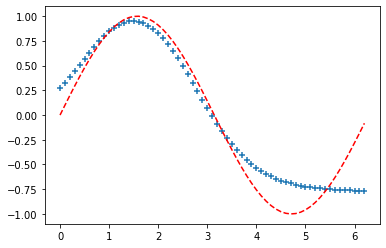

In [8]:
"""Training randomly"""
epoch = 100
for i in range(epoch):
  # batch
  bs = 3  # batch size
  batch_number = int(n_data/bs) + 1
  x_ = np.append(x, x)
  t_ = np.append(t, t)

  ridx = np.arange(len(x_))
  np.random.shuffle(ridx)

  batch_x = []
  batch_t = []
  for i in range(batch_number):
    x_temp = np.array([])
    t_temp = np.array([])
    for j in range(bs):
      x_temp = np.append(x_temp, x_[ridx[bs*i+j]])
      t_temp = np.append(t_temp, t_[ridx[bs*i+j]])
    batch_x.append(x_temp)
    batch_t.append(t_temp)

  index_random = np.arange(batch_number)
  np.random.shuffle(index_random)

  # training
  y = np.array([])

  for i in index_random:
    # forward
    u1 = np.dot(batch_x[i].reshape(-1,1), w1) + b1
    y1 = 1/(1+np.exp(-u1))
    y2 = np.dot(y1, w2) + b2

    # backward
    delta2 = y2 - batch_t[i].reshape(-1,1)
    grad_w2 = np.dot(y1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_y1 = np.dot(delta2, w2.T)
    delta1 = grad_y1 * (1-y1) * y1
    grad_w1 = np.dot(batch_x[i].reshape(-1,1).T, delta1)
    grad_b1 = np.sum(delta1, axis=0)

    # update
    w1 -= eta * grad_w1
    b1 -= eta * grad_b1
    w2 -= eta * grad_w2
    b2 -= eta * grad_b2

    y = np.append(y, y2)
    

# result
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

loss = np.sum(np.square(y2.reshape(-1)-t))/2.0
print('Loss:', loss)
print('Improvement:', init_loss/loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2, marker='+')
plt.show()